In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make index file
#index = pd.read_csv("data/LC675_TTTGGTTGTTGGCGAA/1000000.CNV.bedGraph",sep="\t",header=None).iloc[:,0:3]
#index.columns = ["chrom","start","end"]
#index = index[index["chrom"] != "chrY"]
#index = index["chrom"] + "_" + index["start"].astype(str)
#index = pd.concat([index,pd.DataFrame(np.arange(index.shape[0]))],axis=1)
#index.columns = ["loc","index"]
#index.to_csv("index.csv",index=False)
index = pd.read_csv("index.csv",header=0)

In [23]:
dir = "LC499/LC499_AACGGGAGTCCCGAGT"
contact_mat = pd.read_csv("data/" + dir + "/matrix.mtx",sep="\t",header=0)
contact_mat = contact_mat[(contact_mat["chrom1"] != "chrY") & (contact_mat["chrom2"] != "chrY")]
contact_mat = pd.concat([contact_mat["chrom1"] + "_" + contact_mat["start1"].astype(str),contact_mat["chrom2"] + "_" + contact_mat["start2"].astype(str), contact_mat["count"]],axis=1)
contact_mat.columns = ["loc1","loc2","count"]
contact_mat = pd.merge(contact_mat,index,left_on="loc1",right_on="loc",how="left").drop(["loc","loc1"],axis=1)
contact_mat = contact_mat.rename(columns={contact_mat.columns[2]: "index1"})
contact_mat = pd.merge(contact_mat,index,left_on="loc2",right_on="loc",how="left").drop(["loc","loc2"],axis=1)
contact_mat = contact_mat.rename(columns={contact_mat.columns[2]: "index2"})
contact_mat = coo_matrix((contact_mat['count'], (contact_mat['index1'], contact_mat['index2'])), shape=(index.shape[0], index.shape[0]))
contact_mat = contact_mat.todense()

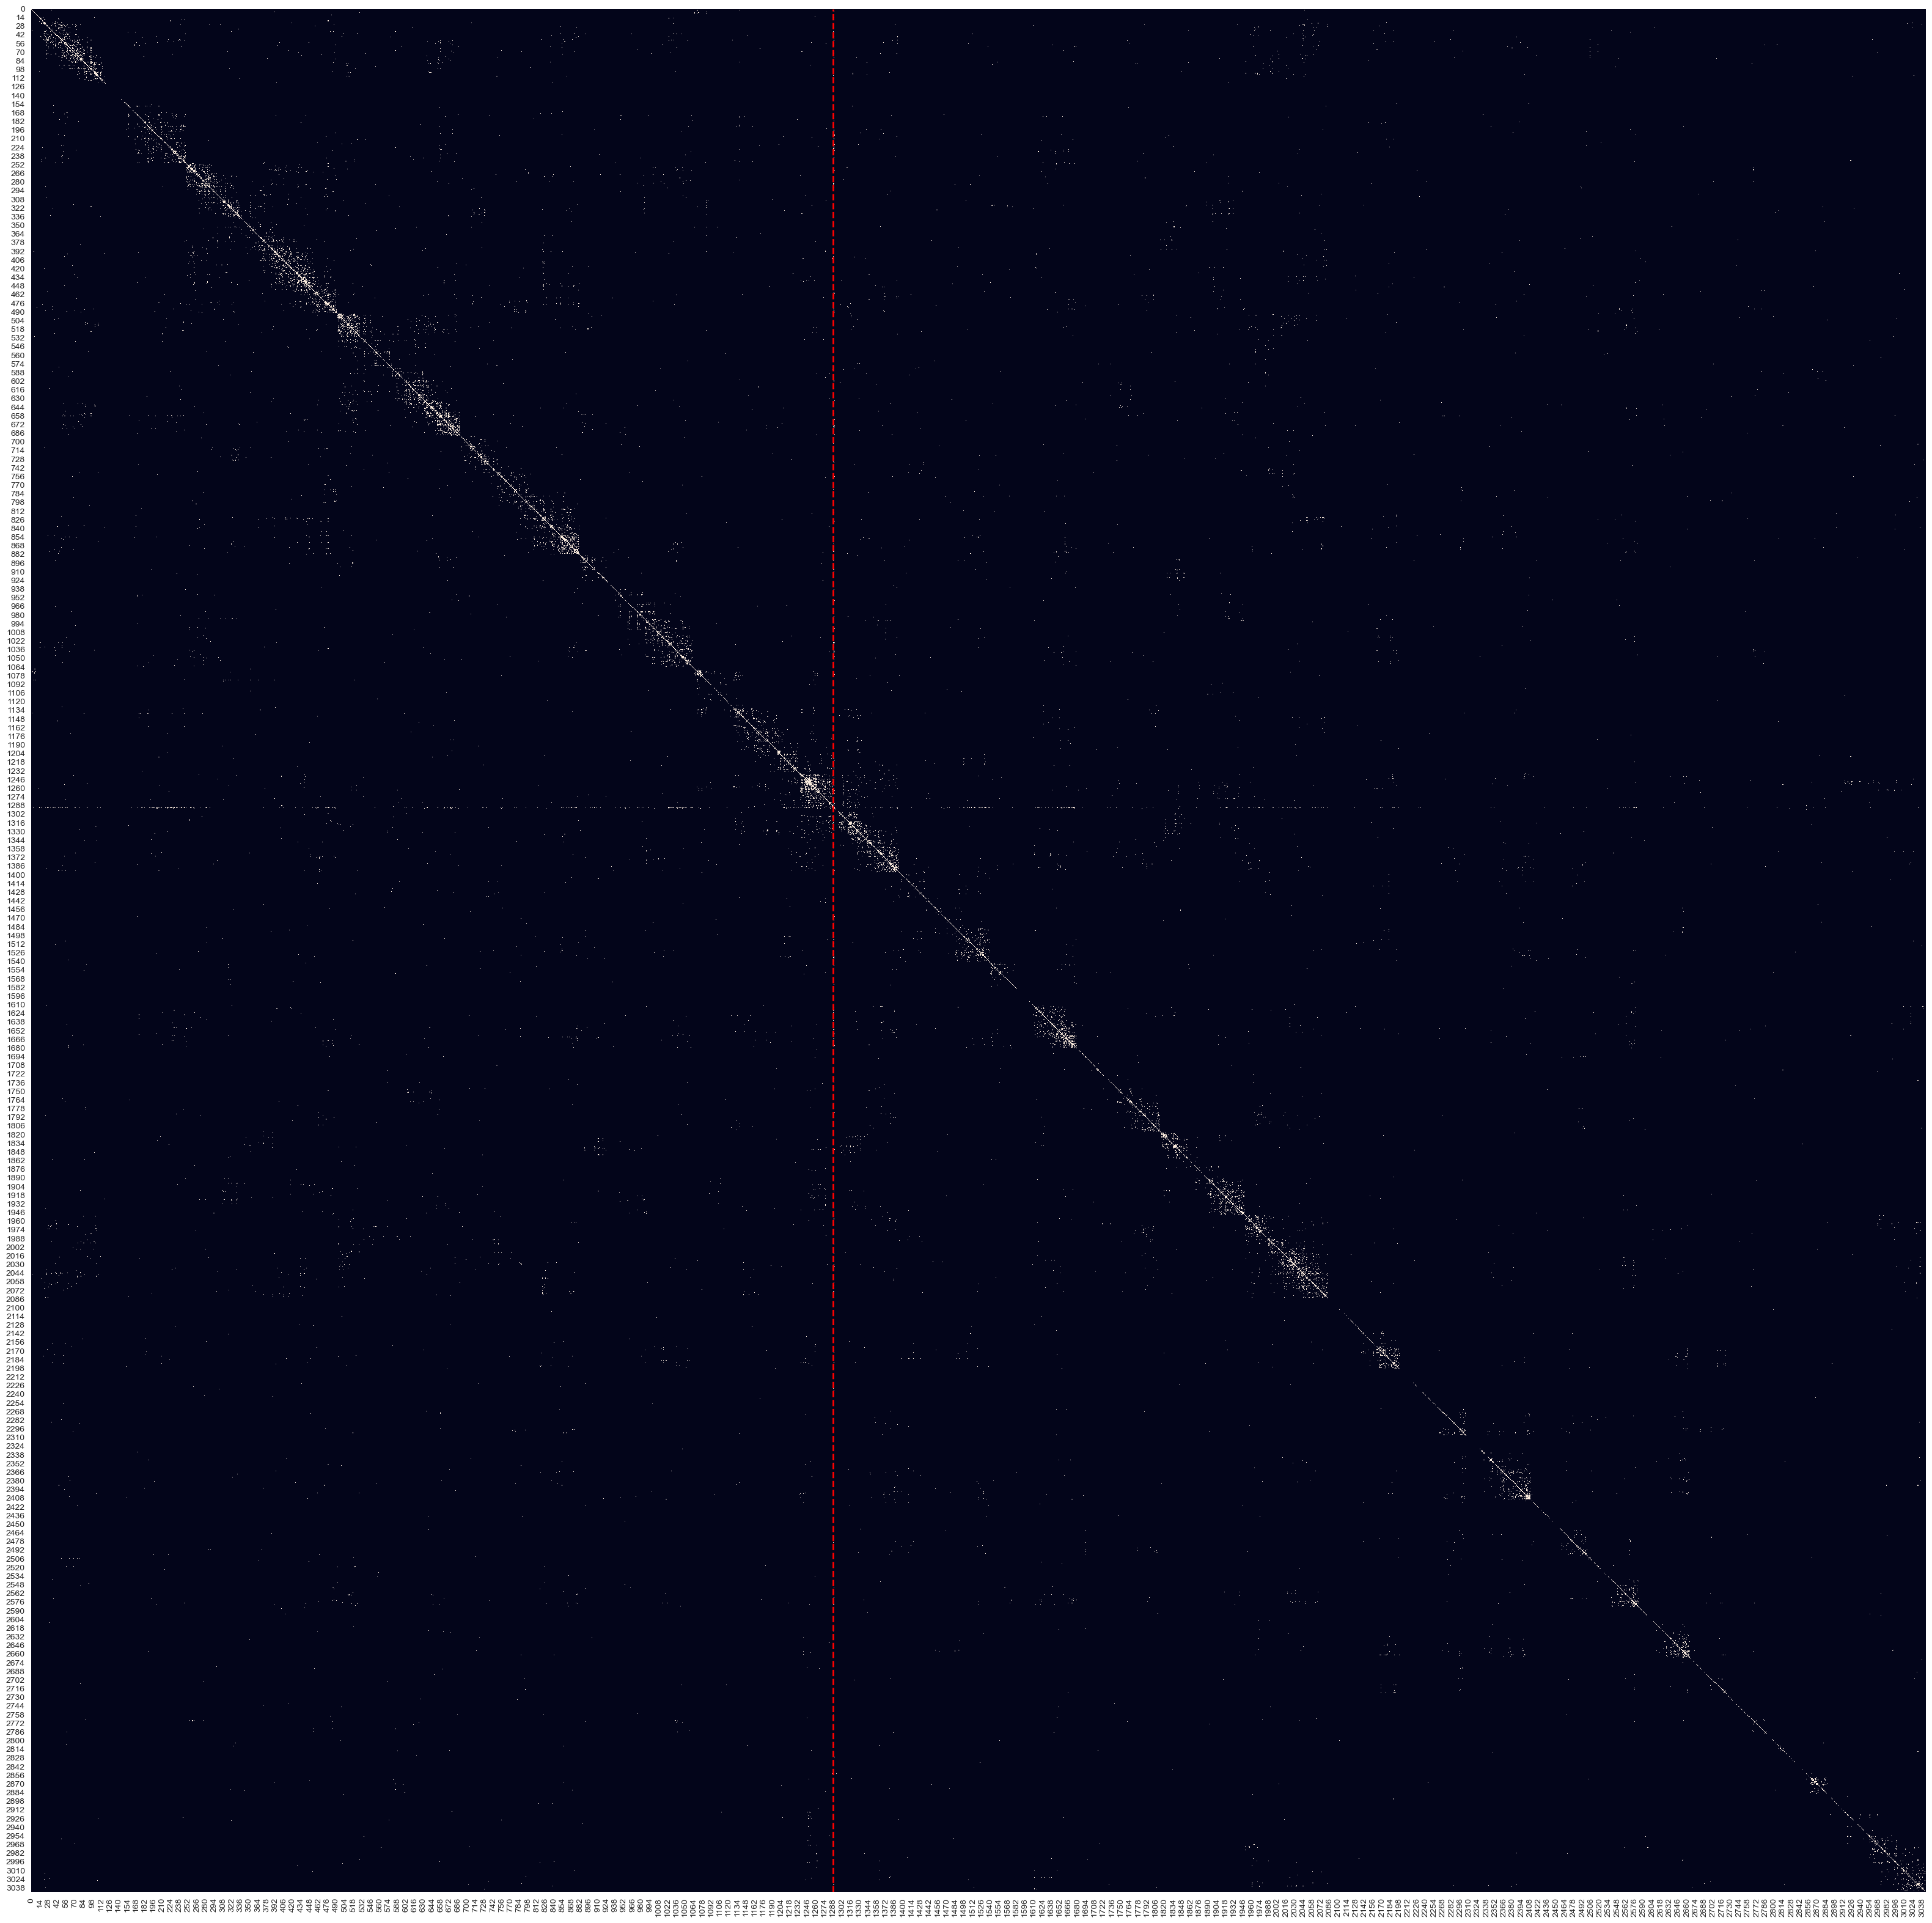

In [21]:
plt.figure(figsize=(40, 40))
plot = sns.heatmap(contact_mat>0,cbar=False)

coord = np.where(index["loc"] == "chr7_54000000")[0][0]
plot.axvline(x=coord, color='red', linestyle='--', linewidth=2)
plt.show()